## Assignment 7.2
### Zach Hill
### 26JAN2020
### DSC-550-T302

In [71]:
import pandas as pd
import yellowbrick
import matplotlib.pyplot as plt
import numpy as np

from yellowbrick.features import Rank2D
from yellowbrick.style import set_palette
from yellowbrick.features import ParallelCoordinates

In [72]:
df = pd.read_csv('./7.2/train.csv')

In [73]:
print('Dimensions: ', df.shape)

Dimensions:  (891, 12)


In [74]:
print('Head: \n', df.head(5))

Head: 
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN      

In [75]:
print('Describe: \n', df.describe)

Describe: 
 <bound method NDFrame.describe of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24  

In [76]:
print('Summary Describe: \n', df.describe(include=['O']))

Summary Describe: 
                        Name   Sex  Ticket    Cabin Embarked
count                   891   891     891      204      889
unique                  891     2     681      147        3
top     Jermyn, Miss. Annie  male  347082  B96 B98        S
freq                      1   577       7        4      644


Histograms: 


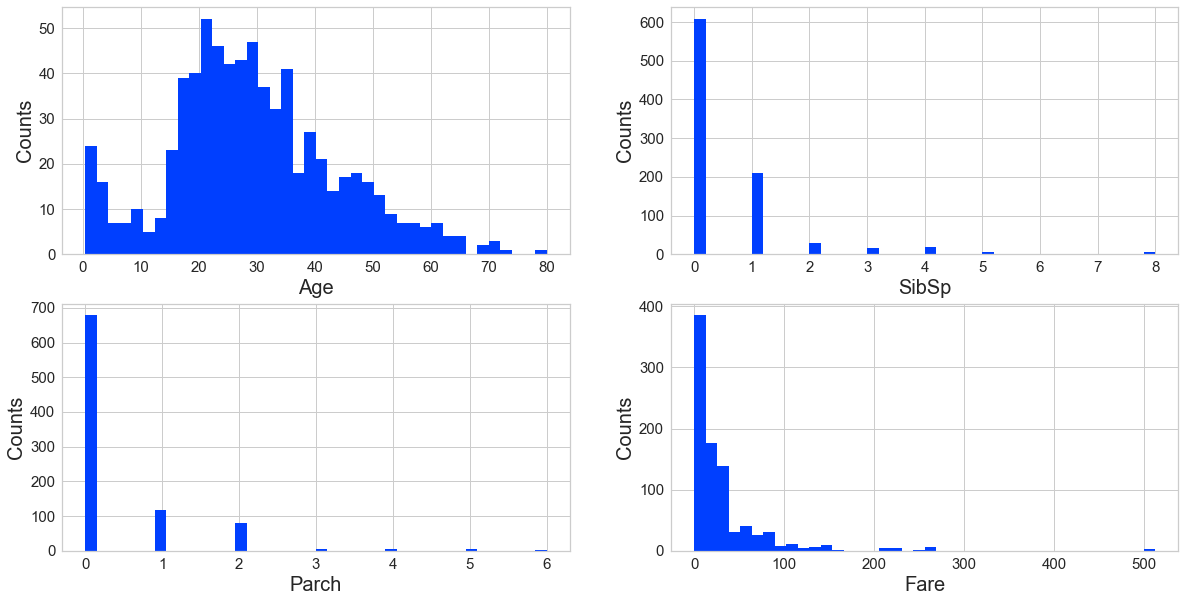

In [77]:
print('Histograms: ')
plt.rcParams['figure.figsize'] = (20, 10)

fig, axes = plt.subplots(nrows = 2, ncols = 2)

xaxes = ['Age', 'SibSp', 'Parch', 'Fare']
yaxes = ['Counts', 'Counts', 'Counts', 'Counts']

axes = axes.ravel()

for idx, ax in enumerate(axes):
    ax.hist(df[xaxes[idx]].dropna(), bins=40)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)


Bar Charts:


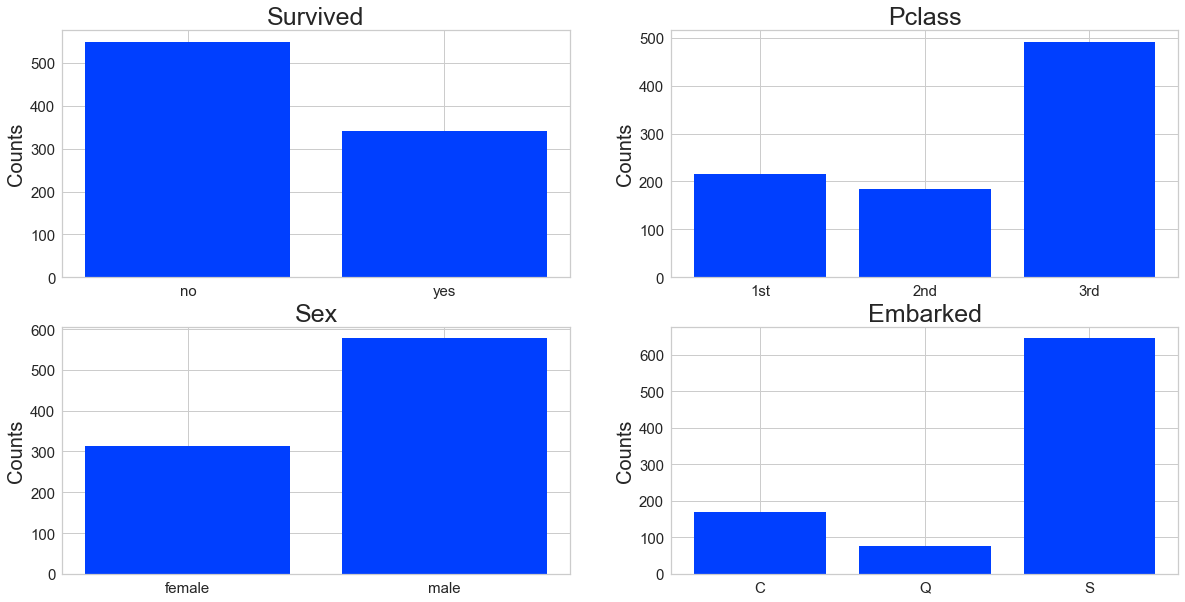

In [78]:
print('Bar Charts:')
plt.rcParams['figure.figsize'] = (20, 10)

fig, axes = plt.subplots(nrows = 2, ncols = 2)

# Survived Bar Chart
X_Survived = df.replace({'Survived': {1: 'yes', 0: 'no'}}).groupby('Survived').size().reset_index(name='Counts')['Survived']
Y_Survived = df.replace({'Survived': {1: 'yes', 0: 'no'}}).groupby('Survived').size().reset_index(name='Counts')['Counts']

axes[0, 0].bar(X_Survived, Y_Survived)
axes[0, 0].set_title('Survived', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)

# Survived Bar Chart
X_Pclass = df.replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}}).groupby('Pclass').size().reset_index(name='Counts')['Pclass']
Y_Pclass = df.replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}}).groupby('Pclass').size().reset_index(name='Counts')['Counts']

axes[0, 1].bar(X_Pclass, Y_Pclass)
axes[0, 1].set_title('Pclass', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)

# Sex Bar Chart
X_Sex = df.groupby('Sex').size().reset_index(name='Counts')['Sex']
Y_Sex = df.groupby('Sex').size().reset_index(name='Counts')['Counts']

axes[1, 0].bar(X_Sex, Y_Sex)
axes[1, 0].set_title('Sex', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)

# Embarked Bar Chart
X_Embarked = df.groupby('Embarked').size().reset_index(name='Counts')['Embarked']
Y_Embarked = df.groupby('Embarked').size().reset_index(name='Counts')['Counts']

axes[1, 1].bar(X_Embarked, Y_Embarked)
axes[1, 1].set_title('Embarked', fontsize=25)
axes[1, 1].set_ylabel('Counts', fontsize=20)
axes[1, 1].tick_params(axis='both', labelsize=15)



Pearson Rankings Heatmap:


array([[22.    ,  1.    ,  0.    ,  7.25  ],
       [38.    ,  1.    ,  0.    , 71.2833],
       [26.    ,  0.    ,  0.    ,  7.925 ],
       ...,
       [    nan,  1.    ,  2.    , 23.45  ],
       [26.    ,  0.    ,  0.    , 30.    ],
       [32.    ,  0.    ,  0.    ,  7.75  ]])

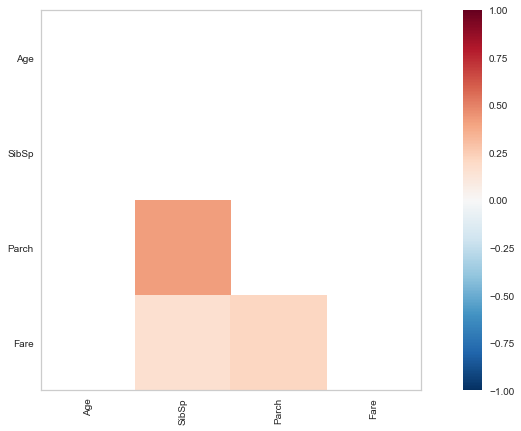

In [79]:
print('Pearson Rankings Heatmap:')
plt.rcParams['figure.figsize'] = (15, 7)

X = df[xaxes].values

visualizer = Rank2D(features=xaxes, algorithm='pearson')
visualizer.fit(X)
visualizer.transform(X)
#visualizer.poof(outpath="./7.2/pcoords1.png")

array([[-0.09674689,  0.05962402, -0.06359895, -0.04870737],
       [ 0.10430865,  0.05962402, -0.06359895,  0.07627731],
       [-0.04648301, -0.06537598, -0.06359895, -0.04738986],
       ...,
       [        nan,  0.05962402,  0.26973438, -0.01708708],
       [-0.04648301, -0.06537598, -0.06359895, -0.00430233],
       [ 0.02891282, -0.06537598, -0.06359895, -0.04773144]])

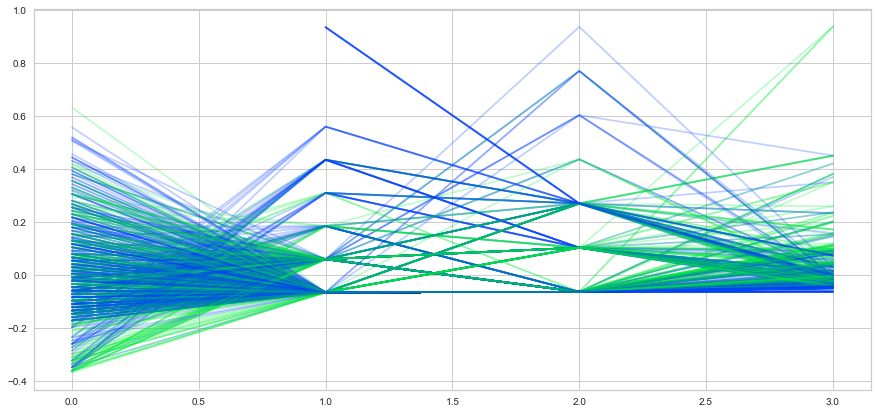

In [80]:
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 50

set_palette('sns_bright')

classes = ['Not-survived', 'Survived']
num_features = ['Age', 'SibSp', 'Parch', 'Fare']

data_norm = df.copy()

for feature in num_features:
    data_norm[feature] = (df[feature] - df[feature].mean(skipna=True)) / (df[feature].max(skipna=True) - df[feature].min(skipna=True))

X = data_norm[num_features].values
y = df.Survived.values

visualizer = ParallelCoordinates(classes=classes, features=num_features)
visualizer.fit(X, y)
visualizer.transform(X)



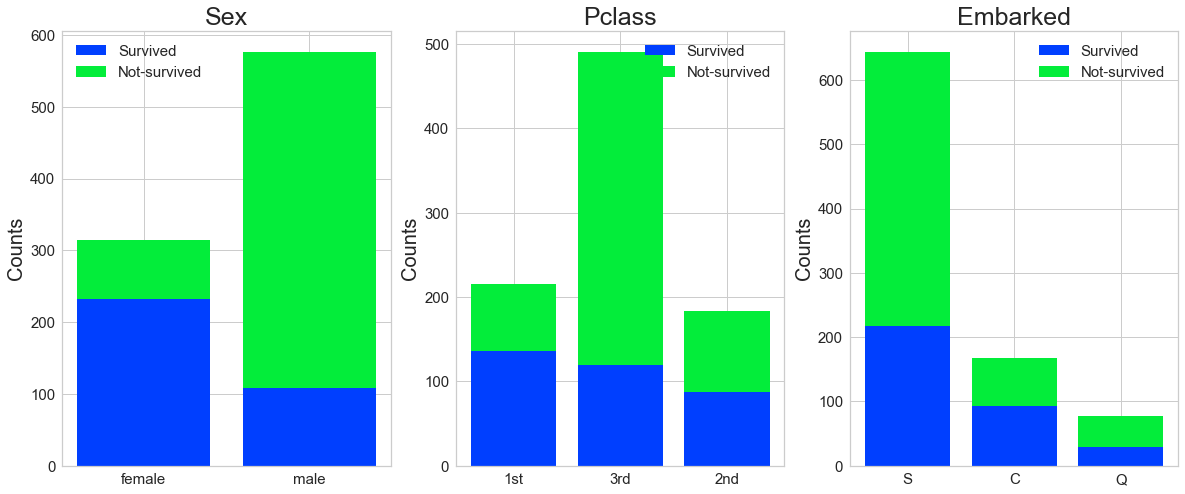

In [81]:
plt.rcParams['figure.figsize'] = (20, 8)

fig, axes = plt.subplots(nrows = 1, ncols = 3)

Sex_survived = df.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}})[df['Survived']==1]['Sex'].value_counts()
Sex_not_survived = df.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}})[df['Survived']==0]['Sex'].value_counts()
Sex_not_survived = Sex_not_survived.reindex(index = Sex_survived.index)

p1 = axes[0].bar(Sex_survived.index, Sex_survived.values)
p2 = axes[0].bar(Sex_not_survived.index, Sex_not_survived.values, bottom=Sex_survived.values)
axes[0].set_title('Sex', fontsize=25)
axes[0].set_ylabel('Counts', fontsize=20)
axes[0].tick_params(axis='both', labelsize=15)
axes[0].legend((p1[0], p2[0]), ('Survived', 'Not-survived'), fontsize = 15)


Pclass_survived = df.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}}).replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}})[df['Survived']==1]['Pclass'].value_counts()
Pclass_not_survived = df.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}}).replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}})[df['Survived']==0]['Pclass'].value_counts()
Pclass_not_survived = Pclass_not_survived.reindex(index = Pclass_survived.index)

p3 = axes[1].bar(Pclass_survived.index, Pclass_survived.values)
p4 = axes[1].bar(Pclass_not_survived.index, Pclass_not_survived.values, bottom=Pclass_survived.values)
axes[1].set_title('Pclass', fontsize=25)
axes[1].set_ylabel('Counts', fontsize=20)
axes[1].tick_params(axis='both', labelsize=15)
axes[1].legend((p3[0], p4[0]), ('Survived', 'Not-survived'), fontsize = 15)


Embarked_survived = df.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}})[df['Survived']==1]['Embarked'].value_counts()
Embarked_not_survived = df.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}})[df['Survived']==0]['Embarked'].value_counts()
Embarked_not_survived = Embarked_not_survived.reindex(index = Embarked_survived.index)

p5 = axes[2].bar(Embarked_survived.index, Embarked_survived.values)
p6 = axes[2].bar(Embarked_not_survived.index, Embarked_not_survived.values, bottom=Embarked_survived.values)
axes[2].set_title('Embarked', fontsize=25)
axes[2].set_ylabel('Counts', fontsize=20)
axes[2].tick_params(axis='both', labelsize=15)
axes[2].legend((p5[0], p6[0]), ('Survived', 'Not-survived'), fontsize = 15)


In [82]:
def fill_na_median(df, inplace=True):
    return df.fillna(df.median(), inplace=inplace)

fill_na_median(df['Age'])

print(df['Age'].describe())

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64


In [83]:
def fill_na_most(df, inplace=True):
    return df.fillna('S', inplace=inplace)

fill_na_most(df['Embarked'])

print(df['Embarked'].describe())

count     891
unique      3
top         S
freq      646
Name: Embarked, dtype: object


In [84]:
def log_transformation(df):
    return df.apply(np.log1p)

df['Fare_log1p'] = log_transformation(df['Fare'])

print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  Fare_log1p  
count  891.000000  891.000000  891.000000  
mean     0.381594   32.204208    2.962246  
std      0.806057   49.693429    0.969048  
min      0.000000    0.000000    0.000000  
25%      0.000000    7.910400    2.187218  
50%      0.000000   14.454200    2.737881  
75%      0.000000   31.000000    3.465736  
max      6.000000

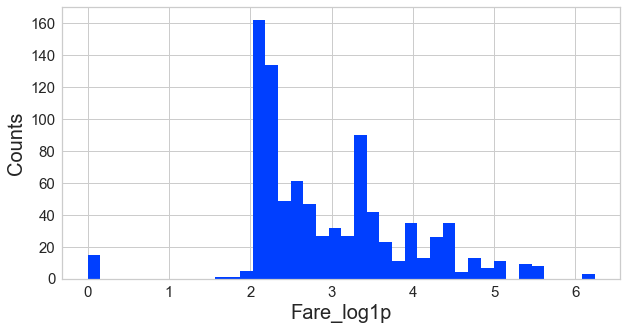

In [85]:
plt.rcParams['figure.figsize'] = (10, 5)

plt.hist(df['Fare_log1p'], bins=40)
plt.xlabel('Fare_log1p', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.tick_params(axis='both', labelsize=15)

In [86]:
cat_features = ['Pclass', 'Sex', "Embarked"]
df_cat = df[cat_features]
df_cat = df_cat.replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}})

df_cat_dummies = pd.get_dummies(df_cat)

print(df_cat_dummies.head(8))


   Pclass_1st  Pclass_2nd  Pclass_3rd  Sex_female  Sex_male  Embarked_C  \
0           0           0           1           0         1           0   
1           1           0           0           1         0           1   
2           0           0           1           1         0           0   
3           1           0           0           1         0           0   
4           0           0           1           0         1           0   
5           0           0           1           0         1           0   
6           1           0           0           0         1           0   
7           0           0           1           0         1           0   

   Embarked_Q  Embarked_S  
0           0           1  
1           0           0  
2           0           1  
3           0           1  
4           0           1  
5           1           0  
6           0           1  
7           0           1  
